### This code heavily based on https://github.com/akcarsten/Perceptron/blob/master/perceptron.ipynb

In [13]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

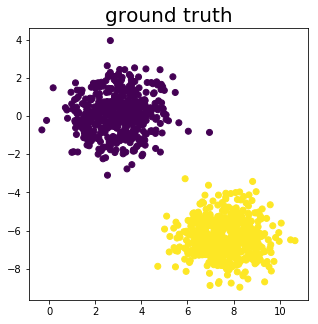

In [42]:
# Generate dataset
X, Y = make_blobs(n_features=2, centers=2, n_samples=1000, random_state=18)

# Visualize dataset
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(X[:, 0], X[:, 1], c=Y)
ax.set_title('ground truth', fontsize=20)
plt.show()

In [15]:
# Add a bias to the X1 vector
X_bias = np.ones([X.shape[0], 3])
X_bias[:, 1:3] = X

# Initialize weights with zeros
w = np.zeros([3, 1])

In [43]:
#lable -1 and 1
y = Y.copy()
y[y<1]=-1

In [35]:
def activation(x):
    return 0 if x > 0 else 1

In [17]:
def calc_unit_vector(x):
    return x.transpose() / np.sqrt(x.transpose().dot(x))

In [18]:
def calc_hyperplane(X, w):
    return np.ravel([-(w[0] + x * w[1]) / w[2] for x in X])

In [36]:
def PLA(X, y):
    N, M = X.shape
    W = np.zeros((M, 1))
    flag = 1
    
    while(flag):
        right_items = 0
        for i in range(N):
            z = y[i] * np.dot(X[i], W)[0]
            if activation(z):
                W = W + y[i] * np.mat(X[i]).T
            else:
                right_items += 1

        if right_items == N:
            flag = 0
        #print(right_items)
            
    return W

In [37]:
w = PLA(X_bias, y)

In [38]:
w

matrix([[-43.        ],
        [  3.36446789],
        [-10.29575547]])

In [39]:
# Calculate the class of the data points with the weight vector
result = [w.transpose().dot(x) for x in X_bias]
result_class = [activation(w.transpose().dot(x)) for x in X_bias]

In [40]:
# Calculate unit vector
w = calc_unit_vector(w).transpose()

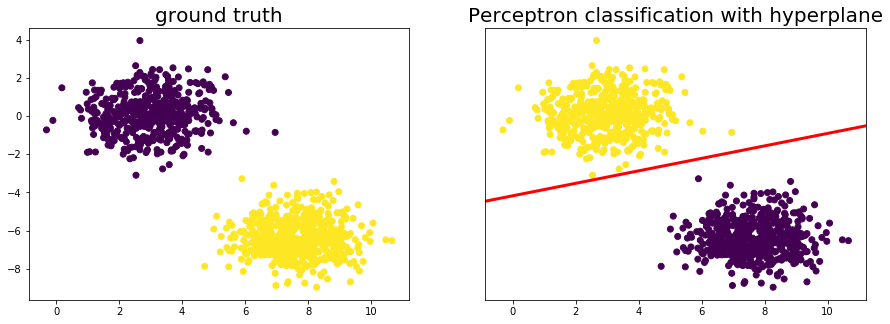

In [41]:
# Visualize results
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].scatter(X[:, 0], X[:, 1], c=Y)
ax[0].set_title('ground truth', fontsize=20)

ax[1].scatter(X[:, 0], X[:, 1], c=result_class)
ax[1].plot([-20, 20], calc_hyperplane([-20, 20], w), lw=3, c='red')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_ylim(ax[0].get_ylim())
ax[1].set_yticks([])
ax[1].set_title('Perceptron classification with hyperplane', fontsize=20)

plt.show()

### Done!